In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

import seaborn as sns

# Data Cleaning and Preparation

## Beneficiary Details Data

In [276]:
train_beneficiary_df = pd.read_csv('/content/Train_Beneficiarydata.csv')
train_beneficiary_df.head()

BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depression  ChronicCond_Diabetes  ChronicCond_IschemicHeart  \
0                       1                     1                          1   
1                       2                     2                          2   
2                       2                     2                          1   
3                       2                     1                          1   
4                       2                     1                          2   

   ChronicCond_Osteoporasis  ChronicCond_rheumatoidarthritis  \
0                         2                                1   
1                         2                                2   
2                         2                                2   
3                         1                                1   
4                         2                                2   

   ChronicCond_stroke  IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
0                   1                     36000                   3204   
1                   2                         0                      0   
2                   2                         0                      0   
3                   2                         0                      0   
4                   2                         0                      0   

   OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
0                        60                     70  
1                        30                     50  
2                        90                     40  
3                      1810                    760  
4                      1790                   1200  

[5 rows x 25 columns]

In [277]:
print('There are ' + str(train_beneficiary_df.shape[0]) + ' rows and ' + str(train_beneficiary_df.shape[1]) + ' columns in the beneficiary details dataset.')

There are 138556 rows and 25 columns in the beneficiary details dataset.


In [278]:
train_beneficiary_df = train_beneficiary_df.loc[:, (train_beneficiary_df != 0).any(axis=0)]

In [279]:
train_beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [280]:
train_beneficiary_df.describe()

Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556.000000   
mean             11.907727            11.910145               1.667817   
std               1.032332             0.936893               0.470998   
min               0.000000             0.000000               1.000000   
25%              12.000000            12.000000               1.000000   
50%              12.000000            12.000000               2.000000   
75%              12.000000            12.000000               2.000000   
max              12.000000            12.000000               2.000000   

       ChronicCond_Heartfailure  ChronicCond_KidneyDisease  \
count             138556.000000              138556.000000   
mean                   1.506322                   1.687643   
std                    0.499962                   0.463456   
min                    1.000000                   1.000000   
25%                    1.000000                   1.000000   
50%                    2.000000                   2.000000   
75%                    2.000000                   2.000000   
max                    2.000000                   2.000000   

       ChronicCond_Cancer  ...  ChronicCond_Depression  ChronicCond_Diabetes  \
count       138556.000000  ...           138556.000000         138556.000000   
mean             1.880041  ...                1.644476              1.398142   
std              0.324914  ...                0.478674              0.489517   
min              1.000000  ...                1.000000              1.000000   
25%              2.000000  ...                1.000000              1.000000   
50%              2.000000  ...                2.000000              1.000000   
75%              2.000000  ...                2.000000              2.000000   
max              2.000000  ...                2.000000              2.000000   

       ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
count              138556.000000             138556.000000   
mean                    1.324143                  1.725317   
std                     0.468056                  0.446356   
min                     1.000000                  1.000000   
25%                     1.000000                  1.000000   
50%                     1.000000                  2.000000   
75%                     2.000000                  2.000000   
max                     2.000000                  2.000000   

       ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
count                    138556.000000       138556.000000   
mean                          1.743180            1.920942   
std                           0.436881            0.269831   
min                           1.000000            1.000000   
25%                           1.000000            2.000000   
50%                           2.000000            2.000000   
75%                           2.000000            2.000000   
max                           2.000000            2.000000   

       IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  \
count             138556.000000          138556.000000   
mean                3660.346502             399.847296   
std                 9568.621827             956.175202   
min                -8000.000000               0.000000   
25%                    0.000000      

In [281]:
train_beneficiary_df.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [282]:
train_beneficiary_df['DOD'] = train_beneficiary_df.DOD.fillna(train_beneficiary_df.DOD.value_counts().index[0])

train_beneficiary_df['DOD'] = pd.to_datetime(train_beneficiary_df['DOD'], format = '%Y-%m-%d')
train_beneficiary_df['DOB'] = pd.to_datetime(train_beneficiary_df['DOB'], format = '%Y-%m-%d')
train_beneficiary_df['Age'] = ((train_beneficiary_df['DOD'] - train_beneficiary_df['DOB']).dt.days/365).astype('int64')

train_beneficiary_df = train_beneficiary_df.drop(columns = ['DOB', 'DOD'])

train_beneficiary_df.head()

BeneID  Gender  Race RenalDiseaseIndicator  State  County  \
0  BENE11001       1     1                     0     39     230   
1  BENE11002       2     1                     0     39     280   
2  BENE11003       1     1                     0     52     590   
3  BENE11004       1     1                     0     39     270   
4  BENE11005       1     1                     0     24     680   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      1   
1                   12                   12                      2   
2                   12                   12                      1   
3                   12                   12                      1   
4                   12                   12                      2   

   ChronicCond_Heartfailure  ...  ChronicCond_Diabetes  \
0                         2  ...                     1   
1                         2  ...                     2   
2                         2  ...                     2   
3                         1  ...                     1   
4                         2  ...                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          1                         2   
1                          2                         2   
2                          1                         2   
3                          1                         1   
4                          2                         2   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  \
0                                1                   1   
1                                2                   2   
2                                2                   2   
3                                1                   2   
4                                2                   2   

   IPAnnualReimbursementAmt  IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                     36000                   3204                        60   
1                         0                      0                        30   
2                         0                      0                        90   
3                         0                      0                      1810   
4                         0                      0                      1790   

   OPAnnualDeductibleAmt  Age  
0                     70   66  
1                     50   73  
2                     40   73  
3                    760   87  
4                   1200   74  

[5 rows x 24 columns]

In [283]:
# Checking on the object column - RenalDiseaseIndicator
train_beneficiary_df.RenalDiseaseIndicator.unique()

array(['0', 'Y'], dtype=object)

In [284]:
label_encoder = preprocessing.LabelEncoder()
train_beneficiary_df['RenalDiseaseIndicator'] = label_encoder.fit_transform(train_beneficiary_df['RenalDiseaseIndicator'])
train_beneficiary_df.RenalDiseaseIndicator.unique()

array([0, 1])

In [285]:
train_beneficiary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   Gender                           138556 non-null  int64 
 2   Race                             138556 non-null  int64 
 3   RenalDiseaseIndicator            138556 non-null  int64 
 4   State                            138556 non-null  int64 
 5   County                           138556 non-null  int64 
 6   NoOfMonths_PartACov              138556 non-null  int64 
 7   NoOfMonths_PartBCov              138556 non-null  int64 
 8   ChronicCond_Alzheimer            138556 non-null  int64 
 9   ChronicCond_Heartfailure         138556 non-null  int64 
 10  ChronicCond_KidneyDisease        138556 non-null  int64 
 11  ChronicCond_Cancer               138556 non-null  int64 
 12  ChronicCond_Obst

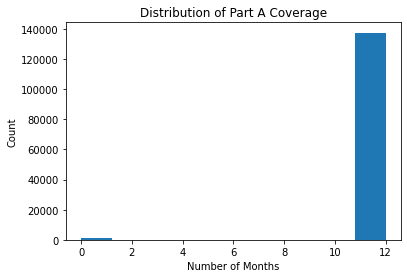

In [286]:
import matplotlib.pyplot as plt

plt.hist(train_beneficiary_df['NoOfMonths_PartACov'])
plt.title('Distribution of Part A Coverage')
plt.xlabel('Number of Months')
plt.ylabel('Count')
plt.show()

## Inpatient Data

In [287]:
train_inPatient_df = pd.read_csv("/content/Train_Inpatientdata.csv");
train_inPatient_df.head()

BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-04-12  ...               2724               19889   
1            NaN  2009-08-31  ...                NaN                 NaN   
2      PHY324689  2009-09-17  ...                NaN                 NaN   
3      PHY349768  2009-02-14  ...              25062               40390   
4            NaN  2009-08-13  ...               5119               29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                 NaN                NaN   
1                NaN                 NaN             7092.0   
2                NaN                 NaN                NaN   
3               4019                 NaN              331.0   
4              20300                 NaN             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 30 columns]

In [288]:
print('There are ' + str(train_inPatient_df.shape[0]) + ' rows and ' + str(train_inPatient_df.shape[1]) + ' columns in the in-patient dataset.')

There are 40474 rows and 30 columns in the in-patient dataset.


In [289]:
train_inPatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [290]:
train_inPatient_df.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [291]:
train_inPatient_df['OperatingPhysician'].fillna('None', inplace = True)
train_inPatient_df['OtherPhysician'].fillna('None', inplace = True)

In [292]:
train_inPatient_df['ClaimStartDt'] = pd.to_datetime(train_inPatient_df['ClaimStartDt'], format = '%Y-%m-%d')
train_inPatient_df['ClaimEndDt'] = pd.to_datetime(train_inPatient_df['ClaimEndDt'], format = '%Y-%m-%d')
train_inPatient_df['ClaimDurationInDays'] = ((train_inPatient_df['ClaimEndDt'] - train_inPatient_df['ClaimStartDt']).dt.days).astype('int64')

train_inPatient_df['AdmissionDt'] = pd.to_datetime(train_inPatient_df['AdmissionDt'], format = '%Y-%m-%d')
train_inPatient_df['DischargeDt'] = pd.to_datetime(train_inPatient_df['DischargeDt'], format = '%Y-%m-%d')
train_inPatient_df['AdmissionDurationInDays'] = ((train_inPatient_df['DischargeDt'] - train_inPatient_df['AdmissionDt']).dt.days).astype('int64')

train_inPatient_df = train_inPatient_df.drop(columns = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt'])

train_inPatient_df.head()

BeneID   ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11001  CLM46614  PRV55912                   26000          PHY390922   
1  BENE11001  CLM66048  PRV55907                    5000          PHY318495   
2  BENE11001  CLM68358  PRV56046                    5000          PHY372395   
3  BENE11011  CLM38412  PRV52405                    5000          PHY369659   
4  BENE11014  CLM63689  PRV56614                   10000          PHY379376   

  OperatingPhysician OtherPhysician ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0               None           None                  7866             1068.0   
1          PHY318495           None                  6186             1068.0   
2               None      PHY324689                 29590             1068.0   
3          PHY392961      PHY349768                   431             1068.0   
4          PHY398258           None                 78321             1068.0   

  DiagnosisGroupCode  ... ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                201  ...               5849                 NaN   
1                750  ...                NaN                 NaN   
2                883  ...                NaN                 NaN   
3                067  ...               4019                 NaN   
4                975  ...              20300                 NaN   

  ClmProcedureCode_1 ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4  \
0                NaN                NaN                NaN                NaN   
1             7092.0                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3              331.0                NaN                NaN                NaN   
4             3893.0                NaN                NaN                NaN   

  ClmProcedureCode_5 ClmProcedureCode_6 ClaimDurationInDays  \
0                NaN                NaN                   6   
1                NaN                NaN                   2   
2                NaN                NaN                   3   
3                NaN                NaN                   8   
4                NaN                NaN                  17   

  AdmissionDurationInDays  
0                       6  
1                       2  
2                       3  
3                       8  
4                      17  

[5 rows x 28 columns]

In [293]:
train_inPatient_df.drop(columns = ['ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace= True)

for ClmProcedureCodeCount in range(4):
    train_inPatient_df['ClmProcedureCode_{}'.format(ClmProcedureCodeCount + 1)].fillna(0, inplace = True)
    
for ClmDiagnosisCodeCount in range(10):
    train_inPatient_df['ClmDiagnosisCode_{}'.format(ClmDiagnosisCodeCount + 1)].fillna('0', inplace = True)

In [294]:
print('Unique values in the DeductibleAmtPaid Column:', train_inPatient_df.DeductibleAmtPaid.unique())

Unique values in the DeductibleAmtPaid Column: [1068.   nan]


In [295]:
train_inPatient_df.DeductibleAmtPaid.fillna(0, inplace = True)

In [296]:
train_inPatient_df.apply(lambda x: x.fillna(x.value_counts().index[0], inplace = True))
train_inPatient_df.head()

BeneID   ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11001  CLM46614  PRV55912                   26000          PHY390922   
1  BENE11001  CLM66048  PRV55907                    5000          PHY318495   
2  BENE11001  CLM68358  PRV56046                    5000          PHY372395   
3  BENE11011  CLM38412  PRV52405                    5000          PHY369659   
4  BENE11014  CLM63689  PRV56614                   10000          PHY379376   

  OperatingPhysician OtherPhysician ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0               None           None                  7866             1068.0   
1          PHY318495           None                  6186             1068.0   
2               None      PHY324689                 29590             1068.0   
3          PHY392961      PHY349768                   431             1068.0   
4          PHY398258           None                 78321             1068.0   

  DiagnosisGroupCode  ... ClmDiagnosisCode_7 ClmDiagnosisCode_8  \
0                201  ...               2724              19889   
1                750  ...                  0                  0   
2                883  ...                  0                  0   
3                067  ...              25062              40390   
4                975  ...               5119              29620   

  ClmDiagnosisCode_9 ClmDiagnosisCode_10 ClmProcedureCode_1  \
0               5849                   0                0.0   
1                  0                   0             7092.0   
2                  0                   0                0.0   
3               4019                   0              331.0   
4              20300                   0             3893.0   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

  ClaimDurationInDays AdmissionDurationInDays  
0                   6                       6  
1                   2                       2  
2                   3                       3  
3                   8                       8  
4                  17                      17  

[5 rows x 26 columns]

In [297]:
train_inPatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BeneID                   40474 non-null  object 
 1   ClaimID                  40474 non-null  object 
 2   Provider                 40474 non-null  object 
 3   InscClaimAmtReimbursed   40474 non-null  int64  
 4   AttendingPhysician       40474 non-null  object 
 5   OperatingPhysician       40474 non-null  object 
 6   OtherPhysician           40474 non-null  object 
 7   ClmAdmitDiagnosisCode    40474 non-null  object 
 8   DeductibleAmtPaid        40474 non-null  float64
 9   DiagnosisGroupCode       40474 non-null  object 
 10  ClmDiagnosisCode_1       40474 non-null  object 
 11  ClmDiagnosisCode_2       40474 non-null  object 
 12  ClmDiagnosisCode_3       40474 non-null  object 
 13  ClmDiagnosisCode_4       40474 non-null  object 
 14  ClmDiagnosisCode_5    

In [298]:
train_inPatient_df.isnull().sum()

BeneID                     0
ClaimID                    0
Provider                   0
InscClaimAmtReimbursed     0
AttendingPhysician         0
OperatingPhysician         0
OtherPhysician             0
ClmAdmitDiagnosisCode      0
DeductibleAmtPaid          0
DiagnosisGroupCode         0
ClmDiagnosisCode_1         0
ClmDiagnosisCode_2         0
ClmDiagnosisCode_3         0
ClmDiagnosisCode_4         0
ClmDiagnosisCode_5         0
ClmDiagnosisCode_6         0
ClmDiagnosisCode_7         0
ClmDiagnosisCode_8         0
ClmDiagnosisCode_9         0
ClmDiagnosisCode_10        0
ClmProcedureCode_1         0
ClmProcedureCode_2         0
ClmProcedureCode_3         0
ClmProcedureCode_4         0
ClaimDurationInDays        0
AdmissionDurationInDays    0
dtype: int64

## Outpatient Data

In [299]:
train_outPatient_df = pd.read_csv('/content/Train_Outpatientdata.csv')
train_outPatient_df.head()

BeneID    ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11  2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12  2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27  2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06  2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22  2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmDiagnosisCode_9  \
0            NaN              78943  ...                NaN   
1            NaN               6115  ...                NaN   
2            NaN               2723  ...                NaN   
3            NaN              71988  ...                NaN   
4            NaN              82382  ...                NaN   

  ClmDiagnosisCode_10 ClmProcedureCode_1 ClmProcedureCode_2  \
0                 NaN                NaN                NaN   
1                 NaN                NaN                NaN   
2                 NaN                NaN                NaN   
3                 NaN                NaN                NaN   
4                 NaN                NaN                NaN   

  ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5 ClmProcedureCode_6  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  DeductibleAmtPaid  ClmAdmitDiagnosisCode  
0                 0                  56409  
1                 0                  79380  
2                 0                    NaN  
3                 0                    NaN  
4                 0                  71947  

[5 rows x 27 columns]

In [300]:
print('There are ' + str(train_outPatient_df.shape[0]) + ' rows and ' + str(train_outPatient_df.shape[1]) + ' columns in the out-patient dataset.')

There are 517737 rows and 27 columns in the out-patient dataset.


In [301]:
train_outPatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisCode_6  

In [302]:
train_outPatient_df.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [303]:
train_outPatient_df['OperatingPhysician'].fillna('None', inplace = True)
train_outPatient_df['OtherPhysician'].fillna('None', inplace = True)

In [304]:
train_outPatient_df['ClaimStartDt'] = pd.to_datetime(train_outPatient_df['ClaimStartDt'], format = '%Y-%m-%d')
train_outPatient_df['ClaimEndDt'] = pd.to_datetime(train_outPatient_df['ClaimEndDt'], format = '%Y-%m-%d')
train_outPatient_df['ClaimDurationInDays'] = ((train_outPatient_df['ClaimEndDt'] - train_outPatient_df['ClaimStartDt']).dt.days).astype('int64')

train_outPatient_df = train_outPatient_df.drop(columns = ['ClaimStartDt', 'ClaimEndDt'])

train_outPatient_df.head()

BeneID    ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11002  CLM624349  PRV56011                      30          PHY326117   
1  BENE11003  CLM189947  PRV57610                      80          PHY362868   
2  BENE11003  CLM438021  PRV57595                      10          PHY328821   
3  BENE11004  CLM121801  PRV56011                      40          PHY334319   
4  BENE11004  CLM150998  PRV56011                     200          PHY403831   

  OperatingPhysician OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0               None           None              78943              V5866   
1               None           None               6115                NaN   
2               None           None               2723                NaN   
3               None           None              71988                NaN   
4               None           None              82382              30000   

  ClmDiagnosisCode_3  ... ClmDiagnosisCode_10 ClmProcedureCode_1  \
0              V1272  ...                 NaN                NaN   
1                NaN  ...                 NaN                NaN   
2                NaN  ...                 NaN                NaN   
3                NaN  ...                 NaN                NaN   
4              72887  ...                 NaN                NaN   

  ClmProcedureCode_2 ClmProcedureCode_3 ClmProcedureCode_4 ClmProcedureCode_5  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  ClmProcedureCode_6  DeductibleAmtPaid  ClmAdmitDiagnosisCode  \
0                NaN                  0                  56409   
1                NaN                  0                  79380   
2                NaN                  0                    NaN   
3                NaN                  0                    NaN   
4                NaN                  0                  71947   

   ClaimDurationInDays  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 26 columns]

In [305]:
train_outPatient_df.drop(columns = ['ClmProcedureCode_3' , 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], axis=1, inplace= True)

for ClmProcedureCodeCount in range(2):
    train_outPatient_df['ClmProcedureCode_{}'.format(ClmProcedureCodeCount + 1)].fillna(0, inplace = True)
    
for ClmDiagnosisCodeCount in range(10):
    train_outPatient_df['ClmDiagnosisCode_{}'.format(ClmDiagnosisCodeCount + 1)].fillna('0', inplace = True)

In [306]:
train_outPatient_df.apply(lambda x: x.fillna(x.value_counts().index[0], inplace = True))
train_outPatient_df.head()

BeneID    ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11002  CLM624349  PRV56011                      30          PHY326117   
1  BENE11003  CLM189947  PRV57610                      80          PHY362868   
2  BENE11003  CLM438021  PRV57595                      10          PHY328821   
3  BENE11004  CLM121801  PRV56011                      40          PHY334319   
4  BENE11004  CLM150998  PRV56011                     200          PHY403831   

  OperatingPhysician OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0               None           None              78943              V5866   
1               None           None               6115                  0   
2               None           None               2723                  0   
3               None           None              71988                  0   
4               None           None              82382              30000   

  ClmDiagnosisCode_3  ... ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
0              V1272  ...                  0                  0   
1                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4              72887  ...              V4577                  0   

  ClmDiagnosisCode_8 ClmDiagnosisCode_9 ClmDiagnosisCode_10  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

  ClmProcedureCode_1 ClmProcedureCode_2  DeductibleAmtPaid  \
0                0.0                0.0                  0   
1                0.0                0.0                  0   
2                0.0                0.0                  0   
3                0.0                0.0                  0   
4                0.0                0.0                  0   

   ClmAdmitDiagnosisCode  ClaimDurationInDays  
0                  56409                    0  
1                  79380                    0  
2                  V7612                    0  
3                  V7612                    0  
4                  71947                    0  

[5 rows x 22 columns]

In [307]:
train_outPatient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   Provider                517737 non-null  object 
 3   InscClaimAmtReimbursed  517737 non-null  int64  
 4   AttendingPhysician      517737 non-null  object 
 5   OperatingPhysician      517737 non-null  object 
 6   OtherPhysician          517737 non-null  object 
 7   ClmDiagnosisCode_1      517737 non-null  object 
 8   ClmDiagnosisCode_2      517737 non-null  object 
 9   ClmDiagnosisCode_3      517737 non-null  object 
 10  ClmDiagnosisCode_4      517737 non-null  object 
 11  ClmDiagnosisCode_5      517737 non-null  object 
 12  ClmDiagnosisCode_6      517737 non-null  object 
 13  ClmDiagnosisCode_7      517737 non-null  object 
 14  ClmDiagnosisCode_8  

In [308]:
train_outPatient_df.isnull().sum()

BeneID                    0
ClaimID                   0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmDiagnosisCode_10       0
ClmProcedureCode_1        0
ClmProcedureCode_2        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
ClaimDurationInDays       0
dtype: int64

## Merging Datasets

In [309]:
train_inPatientMerged = pd.merge(train_inPatient_df, train_beneficiary_df, on = 'BeneID', how = 'inner')
train_inPatientMerged.head()

BeneID   ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11001  CLM46614  PRV55912                   26000          PHY390922   
1  BENE11001  CLM66048  PRV55907                    5000          PHY318495   
2  BENE11001  CLM68358  PRV56046                    5000          PHY372395   
3  BENE11011  CLM38412  PRV52405                    5000          PHY369659   
4  BENE11014  CLM63689  PRV56614                   10000          PHY379376   

  OperatingPhysician OtherPhysician ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
0               None           None                  7866             1068.0   
1          PHY318495           None                  6186             1068.0   
2               None      PHY324689                 29590             1068.0   
3          PHY392961      PHY349768                   431             1068.0   
4          PHY398258           None                 78321             1068.0   

  DiagnosisGroupCode  ... ChronicCond_Diabetes ChronicCond_IschemicHeart  \
0                201  ...                    1                         1   
1                750  ...                    1                         1   
2                883  ...                    1                         1   
3                067  ...                    1                         2   
4                975  ...                    2                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        2                               1                  1   
1                        2                               1                  1   
2                        2                               1                  1   
3                        2                               1                  1   
4                        2                               2                  2   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt OPAnnualReimbursementAmt  \
0                    36000                  3204                       60   
1                    36000                  3204                       60   
2                    36000                  3204                       60   
3                     5000                  1068                      250   
4                    21260                  2136                      120   

  OPAnnualDeductibleAmt Age  
0                    70  66  
1                    70  66  
2                    70  66  
3                   320  95  
4                   100  71  

[5 rows x 49 columns]

In [310]:
train_inPatientMerged.shape

(40474, 49)

In [311]:
train_inPatientMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40474 entries, 0 to 40473
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BeneID                           40474 non-null  object 
 1   ClaimID                          40474 non-null  object 
 2   Provider                         40474 non-null  object 
 3   InscClaimAmtReimbursed           40474 non-null  int64  
 4   AttendingPhysician               40474 non-null  object 
 5   OperatingPhysician               40474 non-null  object 
 6   OtherPhysician                   40474 non-null  object 
 7   ClmAdmitDiagnosisCode            40474 non-null  object 
 8   DeductibleAmtPaid                40474 non-null  float64
 9   DiagnosisGroupCode               40474 non-null  object 
 10  ClmDiagnosisCode_1               40474 non-null  object 
 11  ClmDiagnosisCode_2               40474 non-null  object 
 12  ClmDiagnosisCode_3

In [312]:
train_outPatientMerged.isnull().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
AttendingPhysician                 0
OperatingPhysician                 0
OtherPhysician                     0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
ClmDiagnosisCode_6                 0
ClmDiagnosisCode_7                 0
ClmDiagnosisCode_8                 0
ClmDiagnosisCode_9                 0
ClmDiagnosisCode_10                0
ClmProcedureCode_1                 0
ClmProcedureCode_2                 0
DeductibleAmtPaid                  0
ClmAdmitDiagnosisCode              0
ClaimDurationInDays                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
N

In [313]:
train_outPatientMerged = pd.merge(train_outPatient_df, train_beneficiary_df, on = 'BeneID', how = 'inner')
train_outPatientMerged.head()

BeneID    ClaimID  Provider  InscClaimAmtReimbursed AttendingPhysician  \
0  BENE11002  CLM624349  PRV56011                      30          PHY326117   
1  BENE11003  CLM189947  PRV57610                      80          PHY362868   
2  BENE11003  CLM438021  PRV57595                      10          PHY328821   
3  BENE11004  CLM121801  PRV56011                      40          PHY334319   
4  BENE11004  CLM150998  PRV56011                     200          PHY403831   

  OperatingPhysician OtherPhysician ClmDiagnosisCode_1 ClmDiagnosisCode_2  \
0               None           None              78943              V5866   
1               None           None               6115                  0   
2               None           None               2723                  0   
3               None           None              71988                  0   
4               None           None              82382              30000   

  ClmDiagnosisCode_3  ... ChronicCond_Diabetes ChronicCond_IschemicHeart  \
0              V1272  ...                    2                         2   
1                  0  ...                    2                         1   
2                  0  ...                    2                         1   
3                  0  ...                    1                         1   
4              72887  ...                    1                         1   

  ChronicCond_Osteoporasis ChronicCond_rheumatoidarthritis ChronicCond_stroke  \
0                        2                               2                  2   
1                        2                               2                  2   
2                        2                               2                  2   
3                        1                               1                  2   
4                        1                               1                  2   

  IPAnnualReimbursementAmt IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  \
0                        0                     0                        30   
1                        0                     0                        90   
2                        0                     0                        90   
3                        0                     0                      1810   
4                        0                     0                      1810   

   OPAnnualDeductibleAmt  Age  
0                     50   73  
1                     40   73  
2                     40   73  
3                    760   87  
4                    760   87  

[5 rows x 45 columns]

In [314]:
train_outPatientMerged.shape

(517737, 45)

In [315]:
train_outPatientMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517737 entries, 0 to 517736
Data columns (total 45 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           517737 non-null  object 
 1   ClaimID                          517737 non-null  object 
 2   Provider                         517737 non-null  object 
 3   InscClaimAmtReimbursed           517737 non-null  int64  
 4   AttendingPhysician               517737 non-null  object 
 5   OperatingPhysician               517737 non-null  object 
 6   OtherPhysician                   517737 non-null  object 
 7   ClmDiagnosisCode_1               517737 non-null  object 
 8   ClmDiagnosisCode_2               517737 non-null  object 
 9   ClmDiagnosisCode_3               517737 non-null  object 
 10  ClmDiagnosisCode_4               517737 non-null  object 
 11  ClmDiagnosisCode_5               517737 non-null  object 
 12  Cl

In [316]:
numerical_cols = train_outPatientMerged.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['InscClaimAmtReimbursed', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'DeductibleAmtPaid', 'ClaimDurationInDays', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']


In [317]:
# assuming 'df' is the pandas DataFrame containing the data
numerical_cols = ['InscClaimAmtReimbursed', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'DeductibleAmtPaid', 'ClaimDurationInDays', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']

unique_counts = train_outPatientMerged[numerical_cols].nunique()
print(unique_counts)

InscClaimAmtReimbursed              342
ClmProcedureCode_1                   81
ClmProcedureCode_2                   23
DeductibleAmtPaid                    16
ClaimDurationInDays                  23
Gender                                2
Race                                  4
RenalDiseaseIndicator                 2
State                                52
County                              313
NoOfMonths_PartACov                  13
NoOfMonths_PartBCov                  13
ChronicCond_Alzheimer                 2
ChronicCond_Heartfailure              2
ChronicCond_KidneyDisease             2
ChronicCond_Cancer                    2
ChronicCond_ObstrPulmonary            2
ChronicCond_Depression                2
ChronicCond_Diabetes                  2
ChronicCond_IschemicHeart             2
ChronicCond_Osteoporasis              2
ChronicCond_rheumatoidarthritis       2
ChronicCond_stroke                    2
IPAnnualReimbursementAmt           2859
IPAnnualDeductibleAmt               143


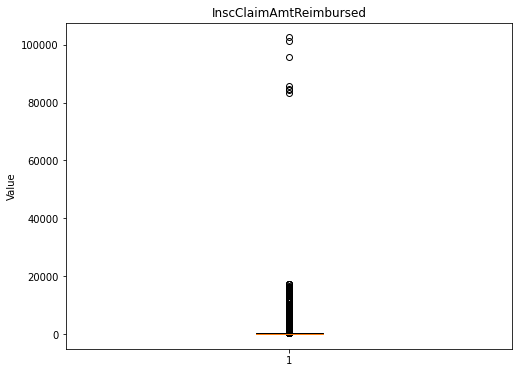

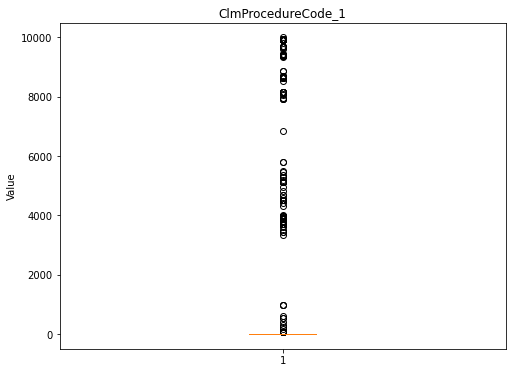

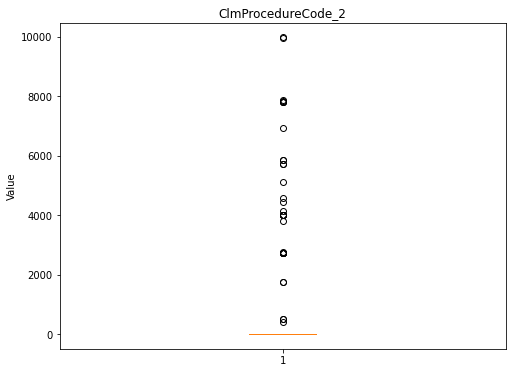

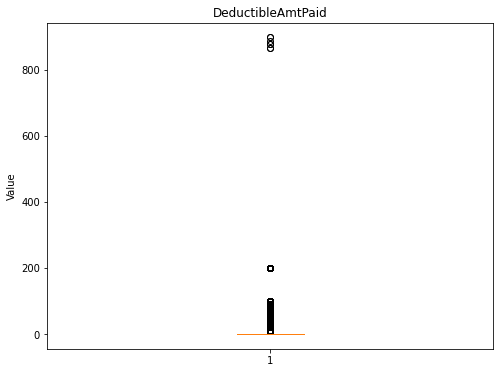

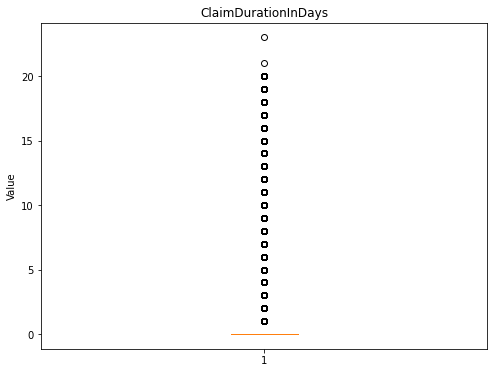

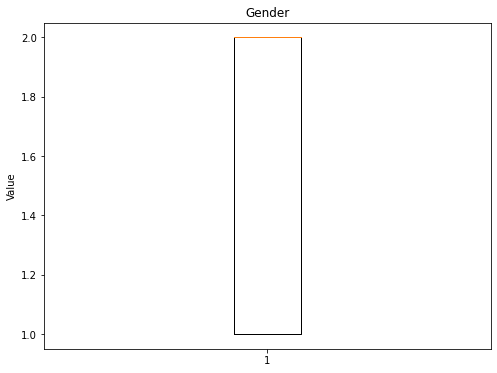

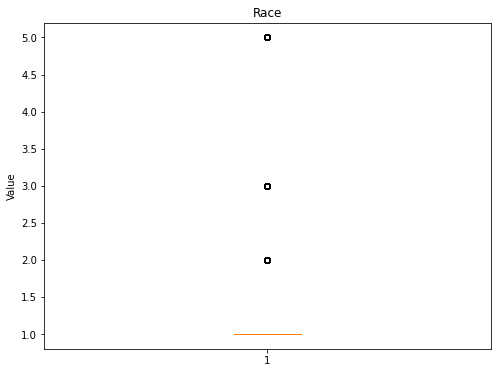

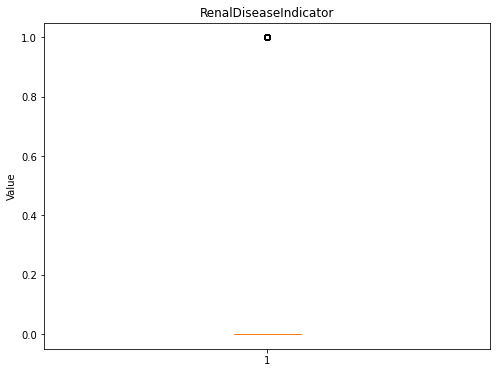

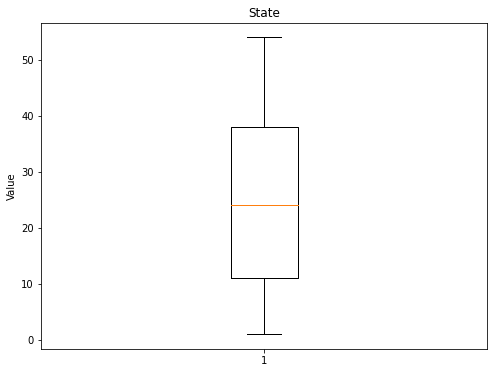

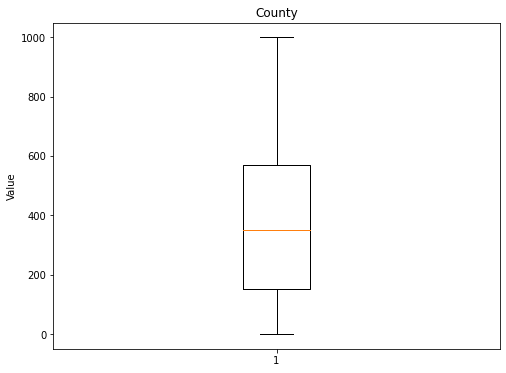

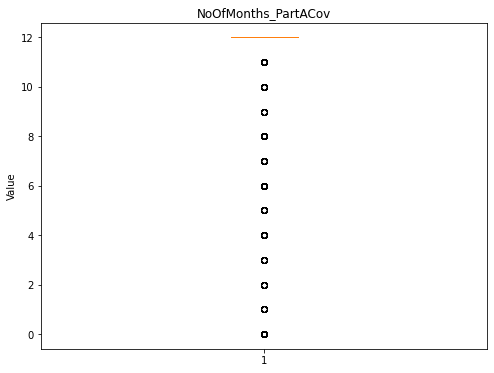

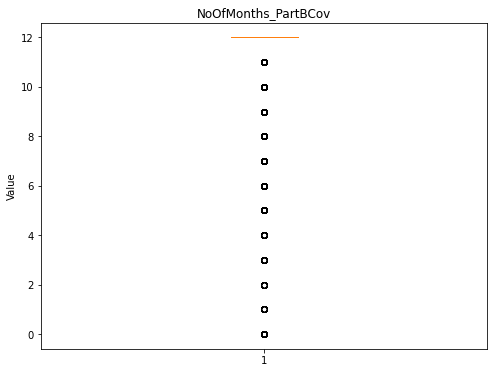

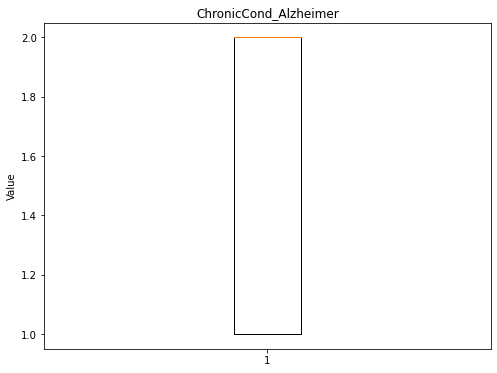

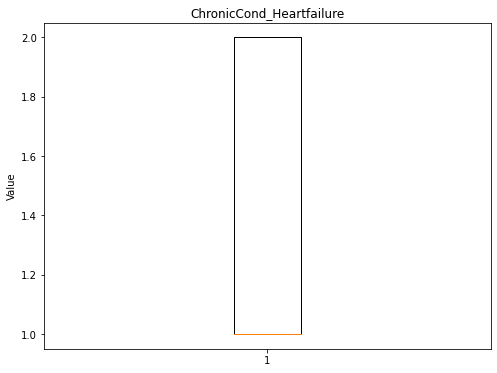

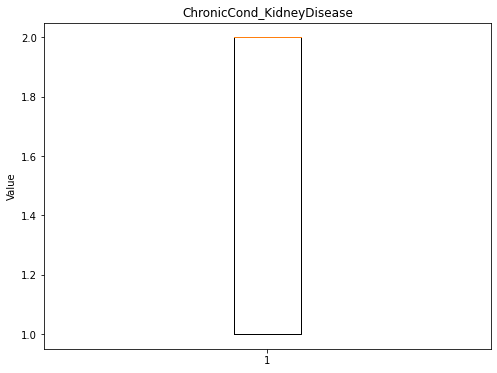

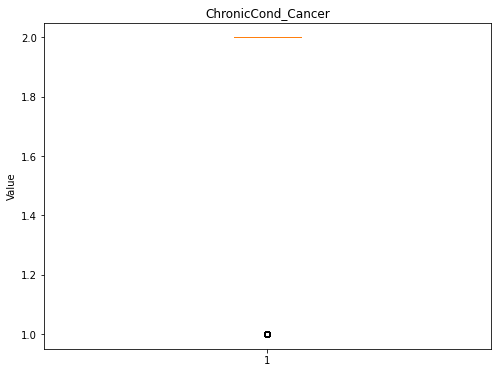

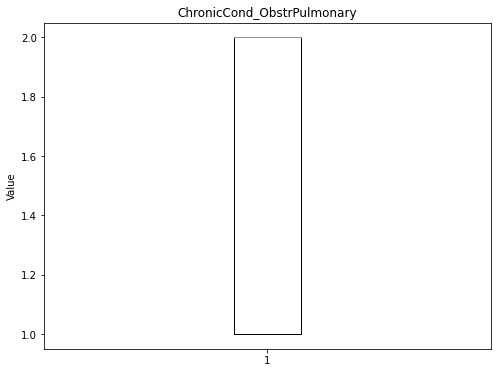

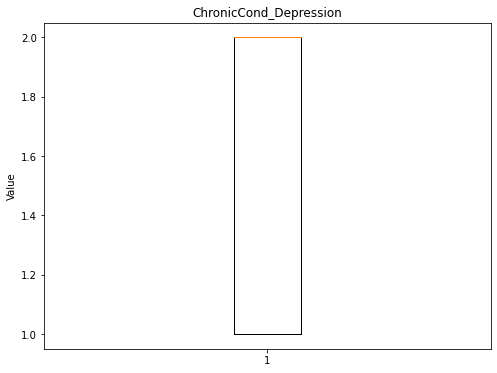

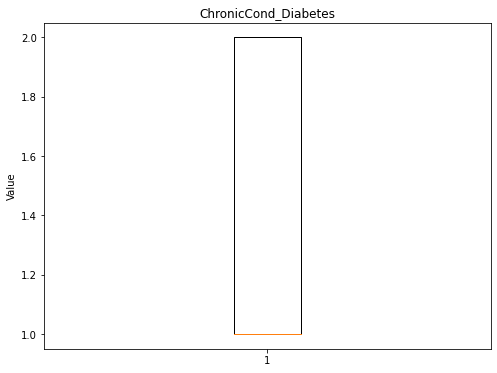

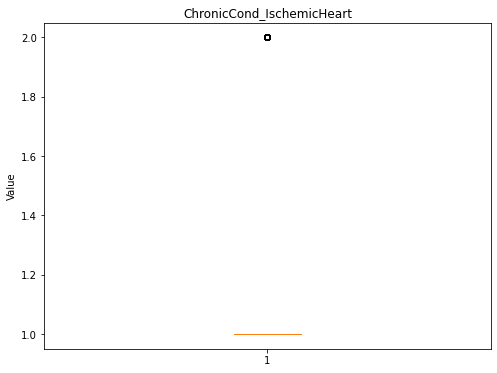

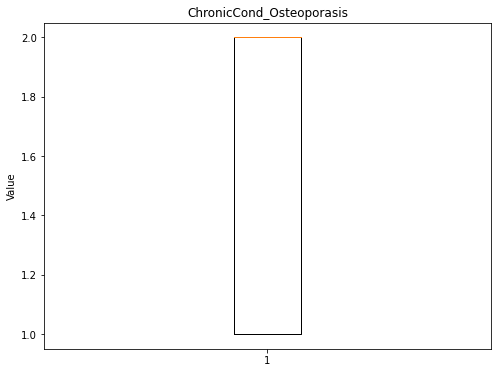

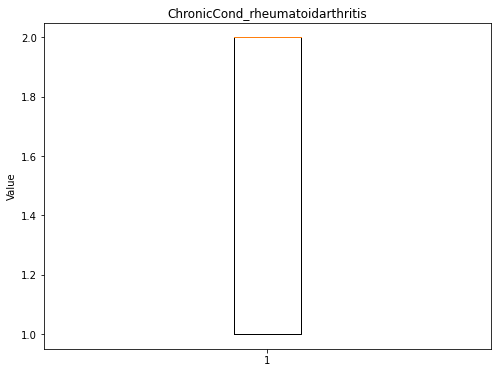

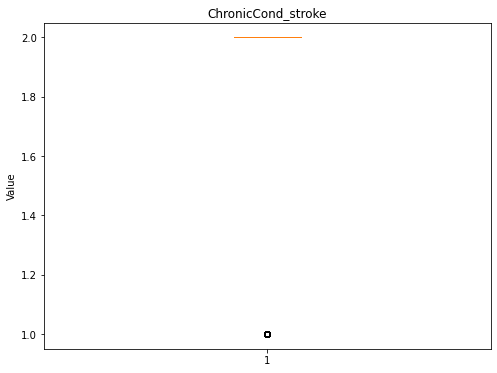

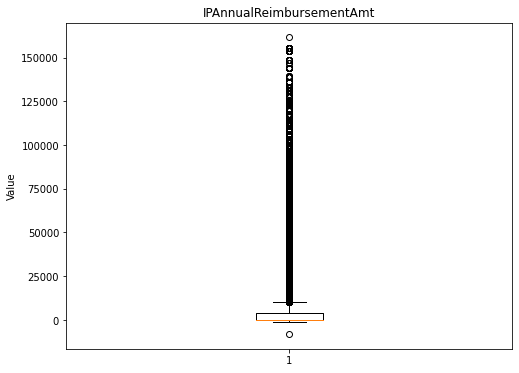

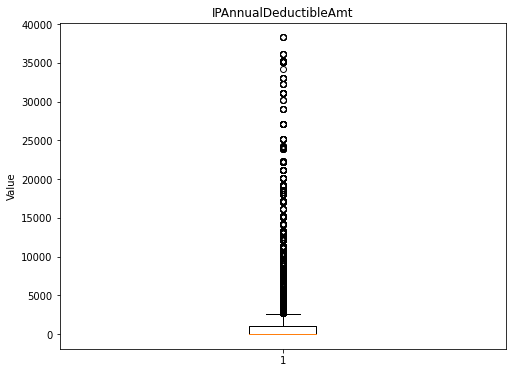

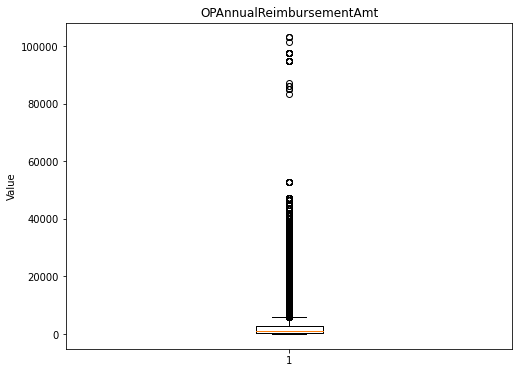

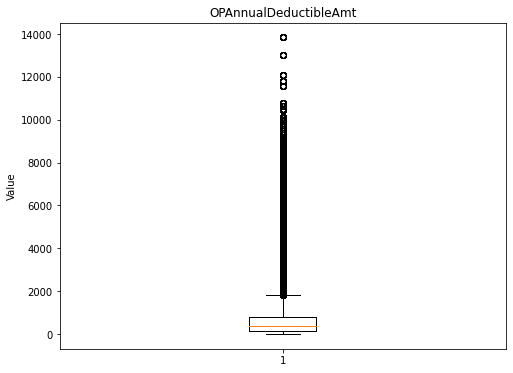

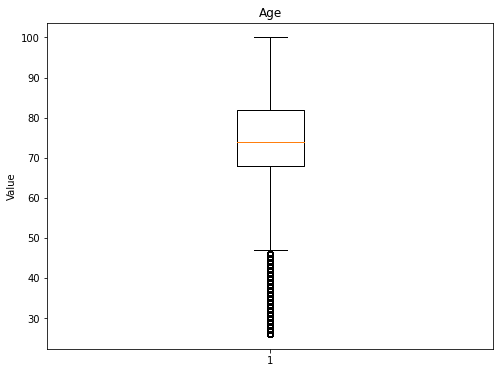

In [318]:
# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(train_outPatientMerged[col])
    plt.title(col)
    plt.ylabel('Value')
    plt.show()

InscClaimAmtReimbursed             12214
ClmProcedureCode_1                   150
ClmProcedureCode_2                    36
DeductibleAmtPaid                  13077
ClaimDurationInDays                27785
Gender                                 0
Race                               11033
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                 3071
NoOfMonths_PartBCov                 3250
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                 49907
IPAnnualReimbursementAmt           12263
IPAnnualDeductib

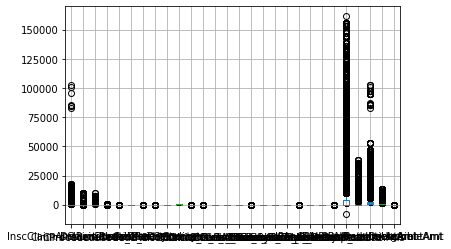

In [319]:
# Create a box plot for each numeric column
train_outPatientMerged.boxplot(column=list(train_outPatientMerged.select_dtypes(include='number').columns))

# Calculate z-scores for all numerical variables
z_scores = train_outPatientMerged.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

In [ ]:
# Define a list of columns to replace outliers
cols_to_replace = ['InscClaimAmtReimbursed','ClmProcedureCode_1','ClmProcedureCode_2','DeductibleAmtPaid','ClaimDurationInDays','Race','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']

# Define a function to replace outliers with the median value
def replace_outliers(train_outPatientMerged, col):
    q1 = train_outPatientMerged[col].quantile(0.25)
    q3 = train_outPatientMerged[col].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    med = np.median(train_outPatientMerged[col])
    for i in train_outPatientMerged[col]:
        if i > upper_tail or i < lower_tail:
            train_outPatientMerged[col] = train_outPatientMerged[col].replace(i, med)
    return train_outPatientMerged

# Replace outliers for each column in the list
for col in cols_to_replace:
    train_outPatientMerged = replace_outliers(train_outPatientMerged, col)

# Plot the boxplots for each column after outlier treatment
fig, axs = plt.subplots(7,2, figsize=(20,30))
axs = axs.ravel()
for i, col in enumerate(cols_to_replace):
    sns.boxplot(x=col, data=train_outPatientMerged, palette="Reds_r", ax=axs[i])
    axs[i].set_title("Box Plot for "+col+" after median imputation")
plt.show()

In [ ]:
train_providerFraud_df = pd.read_csv('/content/Train.csv')
train_providerFraud_df.head()

In [ ]:
train_providerFraud_df.shape

In [ ]:
train_providerFraud_df['PotentialFraud'] = label_encoder.fit_transform(train_providerFraud_df['PotentialFraud'])
train_providerFraud_df.PotentialFraud.unique()

In [ ]:
train_inPatientMergedWithProviderFraud_df = pd.merge(train_inPatientMerged, train_providerFraud_df, on = 'Provider', how = 'inner')
train_inPatientMergedWithProviderFraud_df.head()

In [ ]:
train_inPatientMergedWithProviderFraud_df.shape

In [ ]:
train_inPatientMergedWithProviderFraud_df.info()

In [ ]:
numerical_cols = train_inPatientMerged.select_dtypes(include='number').columns.tolist()
print("Numerical columns:", numerical_cols)

In [ ]:
# assuming 'df' is the pandas DataFrame containing the data
numerical_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClaimDurationInDays', 'AdmissionDurationInDays', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']

unique_counts = train_inPatientMerged[numerical_cols].nunique()

In [ ]:
# Create a box plot for each numeric column
train_inPatientMerged.boxplot(column=list(train_inPatientMerged.select_dtypes(include='number').columns))

# Calculate z-scores for all numerical variables
z_scores = train_inPatientMerged.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-scores greater than 3 or less than -3
outliers = (z_scores > 3) | (z_scores < -3)

# Print the number of outliers for each variable
print(outliers.sum())

In [ ]:
# Define a list of columns to replace outliers
cols_to_replace = ['InscClaimAmtReimbursed ','DeductibleAmtPaid','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClaimDurationInDays','AdmissionDurationInDays','Race','NoOfMonths_PartACov','NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']

# Define a function to replace outliers with the median value
def replace_outliers(train_inPatientMerged, col):
    q1 = train_inPatientMerged[col].quantile(0.25)
    q3 = train_inPatientMerged[col].quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    med = np.median(train_inPatientMerged[col])
    for i in train_inPatientMerged[col]:
        if i > upper_tail or i < lower_tail:
            train_inPatientMerged[col] = train_inPatientMerged[col].replace(i, med)
    return train_inPatientMerged

# Replace outliers for each column in the list
for col in cols_to_replace:
    train_inPatientMerged = replace_outliers(train_inPatientMerged, col)

# Plot the boxplots for each column after outlier treatment
fig, axs = plt.subplots(7,2, figsize=(20,30))
axs = axs.ravel()
for i, col in enumerate(cols_to_replace):
    sns.boxplot(x=col, data=train_inPatientMerged, palette="Reds_r", ax=axs[i])
    axs[i].set_title("Box Plot for "+col+" after median imputation")
plt.show()

In [ ]:
train_inPatientMergedWithProviderFraud_df = train_inPatientMergedWithProviderFraud_df.apply(label_encoder.fit_transform)
train_inPatientMergedWithProviderFraud_df.head()

In [ ]:
train_outPatientMergedWithProviderFraud_df = pd.merge(train_outPatientMerged, train_providerFraud_df, on = 'Provider', how = 'inner')
train_outPatientMergedWithProviderFraud_df.head()

In [ ]:
train_outPatientMergedWithProviderFraud_df.shape

In [ ]:
train_outPatientMergedWithProviderFraud_df.info()

In [ ]:
train_outPatientMergedWithProviderFraud_df = train_outPatientMergedWithProviderFraud_df.apply(label_encoder.fit_transform)
train_outPatientMergedWithProviderFraud_df.head()

In [117]:
train_inPatientMergedWithProviderFraud_df = train_inPatientMergedWithProviderFraud_df.drop(columns = ['BeneID', 'ClaimID', 'Provider'])
train_outPatientMergedWithProviderFraud_df = train_outPatientMergedWithProviderFraud_df.drop(columns = ['BeneID', 'ClaimID', 'Provider'])
print(train_inPatientMergedWithProviderFraud_df.shape, train_outPatientMergedWithProviderFraud_df.shape)

(40474, 47) (517737, 43)


# Modeling

## In-Patient Data

In [118]:
y =  train_inPatientMergedWithProviderFraud_df['PotentialFraud']
X = train_inPatientMergedWithProviderFraud_df.drop('PotentialFraud', axis = 1)

X_list = list(X.columns)

In [119]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (30355, 46)
X_test : (10119, 46)
y_train : (30355,)
y_test : (10119,)


In [120]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.5605995717344754
0.5546990809368515


In [121]:
# shuffle and split the data
data = list(zip(X.values, y))
np.random.shuffle(data)

split = int(0.8 * len(data))
train_data = data[:split]
test_data = data[split:]

X_train = [d[0] for d in train_data]
y_train = [d[1] for d in train_data]
X_test = [d[0] for d in test_data]
y_test = [d[1] for d in test_data]

In [122]:
print("Shape of X_train: ", np.array(X_train).shape)
print("Shape of y_train: ", np.array(y_train).shape)
print("Shape of X_test: ", np.array(X_test).shape)
print("Shape of y_test: ", np.array(y_test).shape)

Shape of X_train:  (32379, 46)
Shape of y_train:  (32379,)
Shape of X_test:  (8095, 46)
Shape of y_test:  (8095,)


In [123]:
X_train = np.array(X_train)
y_train = np.array(y_train)
n = X_train.shape[1]
X_train = X_train.reshape(-1, n)
y_train = y_train.reshape(-1,)

In [124]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_priors = None
        self.mean = None
        self.var = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.mean = np.zeros((len(self.classes), X.shape[1]))
        self.var = np.zeros((len(self.classes), X.shape[1]))

        # calculate class priors
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / float(len(y))

        # calculate mean and variance of each feature for each class
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.mean[i] = np.mean(X_c, axis=0)
            self.var[i] = np.var(X_c, axis=0)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])

        for i, x in enumerate(X):
            posteriors = []

            # calculate posterior probability of each class
            for j, c in enumerate(self.classes):
                prior = np.log(self.class_priors[j])
                posterior = np.sum(np.log(self.gaussian_density(x, self.mean[j], self.var[j])))
                posterior = prior + posterior
                posteriors.append(posterior)

            # assign instance to the class with the highest posterior probability
            y_pred[i] = self.classes[np.argmax(posteriors)]

        return y_pred

    def gaussian_density(self, x, mean, var):
        eps = 1e-4
        coef = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = -(np.power(x - mean, 2) / (2.0 * var + eps))
        return coef * np.exp(exponent)


In [125]:
model = GaussianNaiveBayes()
model.fit(X_train, y_train)

# Convert X_train and X_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy scores
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))


0.5719756632385188
0.5668931439159975
